# Observable Trends
----

#### Note
* There is an obvious correlation between the latitude of a city and it's max heat.
* While there seems to be no corrolation between latitude and cloudiness, the consistancy of cities to congrate at a certain percentages makes me assume that cloud coverage percentage is probably a rounded, or at least not very precise number. Also, many cities are affected seasonally or even hourly so this could change depending on when the code is ran and just generally needs a lot more information.
* Humidity and wind speed also seems to have little to no correlation with latitude with most cities staying below 10mph with the outliers possibly being hurricanes.
* I included a little map of all the cities to make sure that this is a fairly accurate representation of the world.

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as ow

from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [90]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

619


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [91]:
weather_data = []
counter = 0
#places = ["London", "Paris", "Madrid","Boston","Raleigh","Mumbai"]
settings = {"units": "imperial", "appid": api_key}

#calling openweather api
for x in cities:
    try:
        weather_data.append(ow.get_current(x, **settings)) 
#To get around the 60 calls per minute limitation, just wait 1 second between calls.   
        print(f"{counter} {x}")
        counter += 1
        time.sleep(1)
    except:
        print(f"{counter} {x} No weather data for this city")



0 aswan
1 manzhouli
2 qaanaaq
3 mehamn
4 san borja
5 longyearbyen
6 avarua
7 busselton
8 leningradskiy
9 victoria
10 punta arenas
11 illoqqortoormiut No weather data for this city
11 fortuna
12 san patricio
13 san quintin
14 ushuaia
15 the valley
16 cape town
17 coquimbo
18 angoche
19 oktyabrskiy
20 lompoc
21 geraldton
22 castro
23 albany
24 nikolskoye
25 ilulissat
26 ambovombe
27 puerto colombia
28 port lincoln
29 port elizabeth
30 rikitea
31 kysyl-syr
32 hermanus
33 sao filipe
34 hobart
35 bethel
36 bredasdorp
37 nizhneyansk No weather data for this city
37 progreso
38 kodiak
39 tiksi
40 butaritari
41 ilebo
42 bulgan
43 prieska
44 kostomuksha
45 ribeira grande
46 kiunga
47 tuktoyaktuk
48 saint george
49 palabuhanratu No weather data for this city
49 kruisfontein
50 ende
51 port blair
52 ponta do sol
53 mataura
54 chokurdakh
55 bluff
56 junction city
57 georgetown
58 kangaatsiaq
59 esperance
60 attawapiskat No weather data for this city
60 nishihara
61 atar
62 mizdah
63 luderitz
64 we

435 yizheng
436 blyznyuky
437 barra
438 constitucion
439 buzmeyin
440 balakliya
441 robore
442 azimur No weather data for this city
442 manitowoc
443 plettenberg bay
444 hanyang
445 siderno
446 tagusao
447 prince rupert
448 siswa bazar
449 iquique
450 imbituba
451 takoradi
452 bacuit No weather data for this city
452 rexburg
453 hukuntsi
454 pevek
455 zlatoustovsk No weather data for this city
455 punta alta
456 sawakin
457 varnamo
458 grindavik
459 calvinia
460 methoni
461 williston
462 pisco
463 alofi
464 bowen
465 harper
466 portland
467 jiaozuo
468 inverell
469 aksarka
470 itoman
471 garden acres
472 goma
473 qurayyat No weather data for this city
473 piripiri
474 paradwip No weather data for this city
474 neepawa
475 cabedelo
476 hamilton
477 walvis bay
478 sur
479 bartica
480 bulancak
481 komsomolskiy
482 vostok
483 dingle
484 verkhnevilyuysk
485 kurilsk
486 nusaybin
487 oranjemund
488 sirnak
489 kawana waters No weather data for this city
489 ladario
490 gat
491 ypsonas
492 iwak

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [107]:
summary = ['name','sys.country',"main.temp", "main.temp_min", 'main.temp_max', 'main.humidity', 'clouds.all','wind.speed', 'coord.lon', 'coord.lat','dt'] 
data = [response(*summary) for response in weather_data]



TypeError: 'str' object is not callable

In [112]:
column_names = ['Cities',"Country",'Temperature', "Min Temp","Max Temp", "Humidity","Cloudiness", "Wind Speed", "Longitude", "Latitude", "Date"]
weather_data = pd.DataFrame(data, columns=column_names)
#Converting Unix timestamp 
weather_data['Date'] = weather_data['Date'].astype(int)
weather_data['Date'] = pd.to_datetime(weather_data['Date'], unit='s')
#convert to .csv
weather_data.to_csv("city_weather")
weather_data

,Cities,Country,Temperature,Min Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Longitude,Latitude,Date
0,Aswan,EG,77.10,77.10,77.10,31,0,10.25,32.90,24.09,2019-10-03 01:46:10
1,Manzhouli,CN,44.12,44.12,44.12,36,33,16.80,117.43,49.60,2019-10-03 01:51:09
2,Qaanaaq,GL,21.19,21.19,21.19,71,26,4.09,-69.36,77.48,2019-10-03 01:51:10
3,Mehamn,NO,35.03,35.03,35.03,82,100,13.47,27.85,71.03,2019-10-03 01:46:40
4,San Borja,BO,71.41,71.41,71.41,95,25,1.68,-66.75,-14.86,2019-10-03 01:51:12
...,...,...,...,...,...,...,...,...,...,...,...
546,Rio Gallegos,AR,42.80,42.80,42.80,60,0,14.99,-69.22,-51.62,2019-10-03 01:54:06
547,Cap Malheureux,MU,72.82,72.00,73.40,94,75,8.05,57.61,-19.98,2019-10-03 02:02:17
548,Denpasar,ID,82.40,82.40,82.40,83,20,9.17,115.22,-8.65,2019-10-03 02:02:18
549,Kosino,PL,46.69,46.00,48.00,93,0,5.82,19.93,52.56,2019-10-03 02:02:19


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

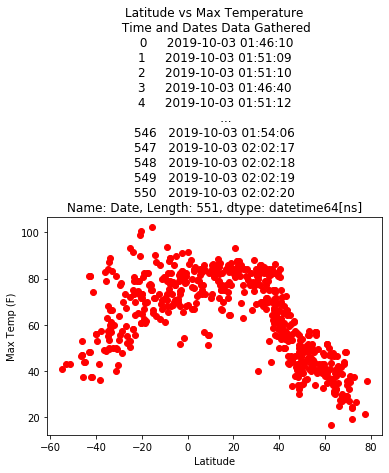

<Figure size 432x288 with 0 Axes>

In [115]:
x_axis = weather_data["Latitude"]
y_axis = weather_data['Max Temp']

plt.title(f"Latitude vs Max Temperature\n Time and Dates Data Gathered\n {weather_data['Date']}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.scatter(x_axis, y_axis, marker="o", color="red")
plt.show()
#save as png  
plt.savefig("graphs/Maxtemp.png")

#### Latitude vs. Humidity Plot

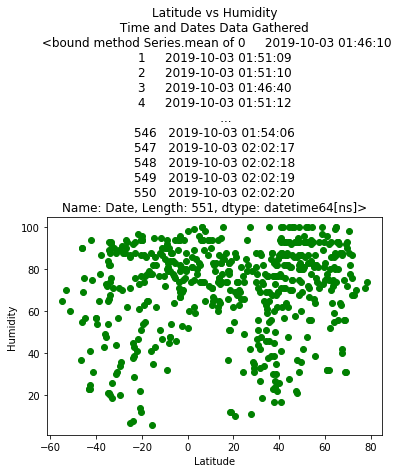

<Figure size 432x288 with 0 Axes>

In [121]:
x_axis = weather_data["Latitude"]
y_axis = weather_data['Humidity']

plt.title(f"Latitude vs Humidity\n Time and Dates Data Gathered \n {weather_data['Date']}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_axis, y_axis, marker="o", color="green")
plt.show()
#save as png
plt.savefig("graphs/Humidity.png")

#### Latitude vs. Cloudiness Plot

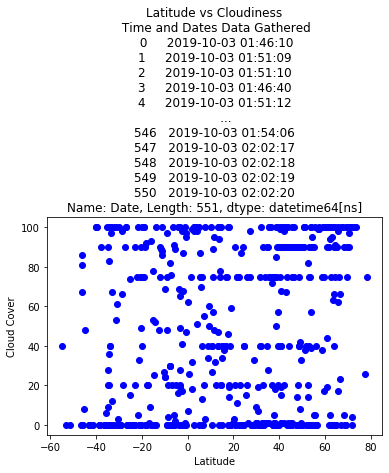

<Figure size 432x288 with 0 Axes>

In [119]:
x_axis = weather_data["Latitude"]
y_axis = weather_data['Cloudiness']

plt.title(f"Latitude vs Cloudiness\n Time and Dates Data Gathered\n {weather_data['Date']}")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover")

plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.show()
#save as png
plt.savefig("graphs/Cloudiness.png")

#### Latitude vs. Wind Speed Plot

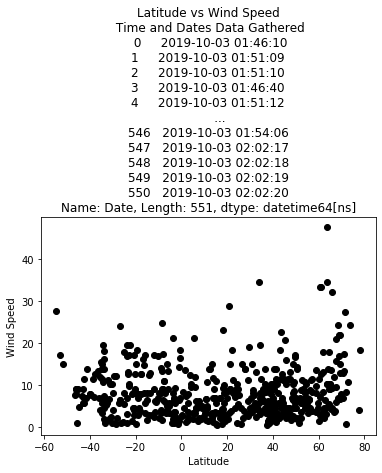

<Figure size 432x288 with 0 Axes>

In [122]:
x_axis = weather_data["Latitude"]
y_axis = weather_data['Wind Speed']

plt.title(f"Latitude vs Wind Speed\n Time and Dates Data Gathered\n {weather_data['Date']}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_axis, y_axis, marker="o", color="black")
plt.show()
#save as png
plt.savefig("graphs/WindSpeed.png")

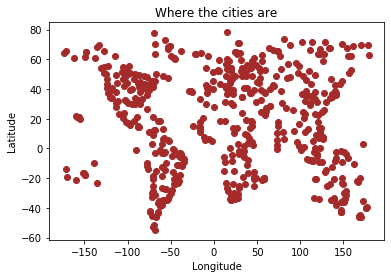

<Figure size 432x288 with 0 Axes>

In [98]:
#Just for fun a little map of the world based on these cities
x_axis = weather_data["Longitude"]
y_axis = weather_data['Latitude']

plt.title("Where the cities are")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(x_axis, y_axis, marker="o", color="brown")
plt.show()
#save as png
plt.savefig("graphs/JustForFun.png")